In [7]:
# text data preprocessing
import pandas as pd
import re
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords, wordnet
#from nltk import word_tokenize
#from nltk.stem.wordnet import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()
import warnings
warnings.filterwarnings(action='ignore')
import re
import spacy

# text data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns

In [8]:
# tweets about Tesla on 07/11/2022 
tweets_df = pd.read_csv('/Users/miali/Downloads/Tesla_Twi.csv')
tweets_df = tweets_df[['id', 'date', 'tweet', 'nretweets']]
tweets_df.head()

,id,date,tweet,nretweets
0,1546541426317590528,2022-07-11 17:06:24,@GailAlfarATX @elonmusk @Tesla @teslacn @Tesla...,0
1,1546541415857102850,2022-07-11 17:06:21,@elonmusk @GailAlfarATX @Tesla @teslacn @Tesla...,0
2,1546541411897581568,2022-07-11 17:06:20,"@elonmusk #Think about buying a country , #Mex...",0
3,1546541379110805508,2022-07-11 17:06:12,"@get_innocuous Actual receipts, and yet you ha...",0
4,1546541363470028800,2022-07-11 17:06:09,Tesla wall battery for the save! Power went ou...,0


In [9]:
tweets_df.date = pd.to_datetime(tweets_df.date)

In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
def clean_and_lemmatize_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags (but keep the text after '#')
    tweet = re.sub(r'#', '', tweet)
    # Remove special characters, punctuation, and numbers
    tweet = re.sub(r"[^a-zA-Z\s]", '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove extra whitespace
    tweet = tweet.strip()
    tweet = re.sub(r'\s+', ' ', tweet)
    # Lemmatize the tweet using spaCy
    doc = nlp(tweet)
    lemmatized_tweet = ' '.join([token.lemma_ for token in doc if token.is_alpha])  # Keep only alphabetic tokens
    return lemmatized_tweet

In [12]:
tweets_df['cleaned_tweet'] = tweets_df['tweet'].apply(clean_and_lemmatize_tweet)

In [13]:
print(tweets_df.head())

                    id                date  \
0  1546541426317590528 2022-07-11 17:06:24   
1  1546541415857102850 2022-07-11 17:06:21   
2  1546541411897581568 2022-07-11 17:06:20   
3  1546541379110805508 2022-07-11 17:06:12   
4  1546541363470028800 2022-07-11 17:06:09   

                                               tweet  nretweets  \
0  @GailAlfarATX @elonmusk @Tesla @teslacn @Tesla...          0   
1  @elonmusk @GailAlfarATX @Tesla @teslacn @Tesla...          0   
2  @elonmusk #Think about buying a country , #Mex...          0   
3  @get_innocuous Actual receipts, and yet you ha...          0   
4  Tesla wall battery for the save! Power went ou...          0   

                                       cleaned_tweet  
0  I have six of they still live at home be homes...  
1  then go for your dozen kid you be just miss mo...  
2  think about buy a country mexico you could tur...  
3  actual receipt and yet you have not ask anyone...  
4  tesla wall battery for the save power go o

In [14]:
tweets_df.tweet[0]

'@GailAlfarATX @elonmusk @Tesla @teslacn @TeslaOwnersEBay @blueskykites @Kristennetten @JenniCurrent @daelmor @IheartTesla @EvrybodynthrMom I have six. 4 of them still live at home being homeschooled -taught self-education , research. Beyond public education. This nation has pushed society in the wrong direction. Change time'

In [15]:
tweets_df.cleaned_tweet[0]

'I have six of they still live at home be homeschoole teach selfeducation research beyond public education this nation have push society in the wrong direction change time'

In [16]:
from collections import Counter
all_words = ' '.join(tweets_df['cleaned_tweet']).split()
word_counts = Counter(all_words)

In [19]:
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
print(word_freq_df)

             Word  Frequency
74          tesla       7908
9              be       5922
22            the       5704
58             to       4401
41              a       4199
...           ...        ...
11463        honk          1
11465    hrvatska          1
11467      drzava          1
11468      sklopu          1
22499  powerhouse          1

[22500 rows x 2 columns]


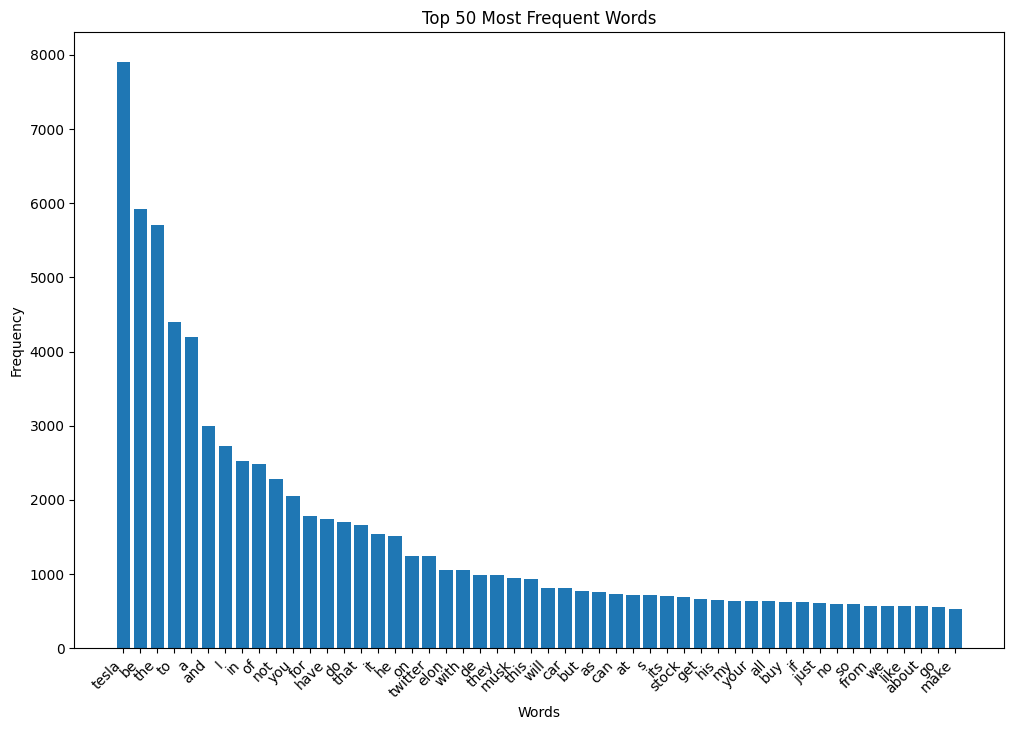

In [17]:
most_common_words = word_counts.most_common(50)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 8))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Top 50 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

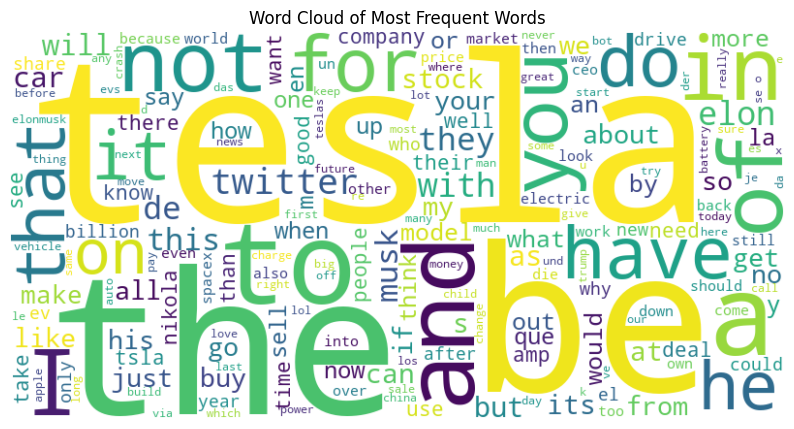

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Remove axes
plt.title("Word Cloud of Most Frequent Words")
plt.show()

In [20]:
tweets_df.to_csv('/Users/miali/Downloads/Tesla_Twi_cleaned_lemmatized.csv', index=False)